# Data visualization with $R_0$, $R_1$, $R_2$.
## Transverse-momentum-dependent Multiplicities of Charged Hadrons for HERMES Airapetian:2012ki and COMPASS Collaborations Adolph:2013stb. 
### Penn State Berks, Fall 2019 
#### * Alexei  Prokudin*

In [1]:
############
# imports ##
############

from matplotlib import pyplot as py
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import fitpack
import interface
import obslib.sidis.reader
from qcdlib.auxiliary import AUX
from tools.config import conf
import copy
%matplotlib inline

This function reads data from multiple files and merges the data frames.

In [2]:
def get_data():
    # Merge all of the data tables
    return reduce(partial(pd.DataFrame.merge, how="outer"), map(pd.DataFrame, conf["sidis tabs"].values()))

Upol_hermes_no_filters.py defines data files to read, no filters applied yet to the data selection. Here we read all HERMES multiplicities.

In [3]:
input_file = "../inputs/upol_hermes_no_filters.py"

CUTMIN = 0.0

filterstr = "dy>"

The interface.py allows to get configuration file from the file that we read.

In [4]:
interface.gen_config(input_file)  # Read file

conf["datasets"]["sidis"]["filters"][0] = filterstr + str(CUTMIN)  # Apply filter with min cut

conf["aux"] = AUX()
conf["sidis tabs"] = obslib.sidis.reader.READER().load_data_sets("sidis")

data = get_data().sort_values("dy")

loading sidis data sets 1007

These are columns we have in the data files:

In [5]:
print(", ".join(sorted(data.columns)))

Ebeam, F2, Q2, R, R0, R1, R2, W2, col, dy, hadron, i, lnR, obs, pT, qT, stat_u, systabs_u, systole, systrel, target, value, x, xn, y, yf, yh, yi, yp, z, zn


Let us create a column with product $R_0 R_1R_2$

In [6]:
data["RCUT"] = data["R0"]*data["R1"]*data["R2"]


Some custom plotting functions are defined here:

In [7]:
def custom_label(label):
    if label =="Q2":
        label="$Q^2$"
    if label =="qT":
        label="$q_T$"
    if label =="qT":
        label="$q_T$"
    if label =="W2":
        label="$W^2\; (GeV^2)$"
    if label =="qToverQ":
        label="$q_T/Q$"
    if label =="qToverQ2":
        label="$q_T^2/Q^2$"
    if label =="dy":
        label="$y_p-y_h$"
    if label =="yh_minus_yp":
        label="$y_h-y_p$"
    if label =="yi":
        label="$y_i$"
    if label =="yf":
        label="$y_f$"
    if label =="yh":
        label="$y_h$"
    if label =="yp":
        label="$y_p$"
    if label =="yi_minus_yp":
        label="$|y_i - y_p|$"
    if label =="yf_minus_yh":
        label="$|y_f - y_h|$"
    if label =="yi_minus_yp_over_yp":
        label="$|(y_i - y_p)/yp|$"
    if label =="yf_minus_yh_over_yh":
        label="$|(y_f - y_h)/yh|$"
    if label =="R":
        label="$|R|$"    
    if label =="lnR":
        label="$ln(|R|)$"    
    if label =="R2":
        label="$R_2$"    
    if label =="R1":
        label="$R_1$"    
    if label =="R0":
        label="$R_0$"    

    return label

def color_plot(data,vert_lab, hor_lab, cmap="plasma", alpha=1.0):
    vert = data[vert_lab].values
    hor = data[hor_lab].values
     
    data_q = data["RCUT"]
    #colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    color_percentiles = partial(percentileofscore, data_q)
    colors = data_q.apply(color_percentiles)
    
    fig, ax = plt.subplots()
    ax.set_ylabel(custom_label(vert_lab))
    ax.set_xlabel(custom_label(hor_lab))
    ax.set_xticks(np.arange(0,1.1,.1))
    ax.set_yscale('log')
    ax.scatter(hor, vert, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)

    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)

    #fig.tight_layout()
    
    return fig, ax, vert, hor

def color_plot3D(data,x_lab, y_lab, z_lab, cmap="plasma", alpha=1.0):
    xval = data[x_lab].values
    yval = data[y_lab].values
    zval = data[z_lab].values


    data_q = data["RCUT"]

    #colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    color_percentiles = partial(percentileofscore, data_q)
    colors = data_q.apply(color_percentiles)
    
    fig = plt.figure()
    ax = Axes3D(fig)#fig.add_subplot(111, projection = "3d")

    
    ax.scatter(xval, yval, zval, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)


    ax.set_zlabel(custom_label(z_lab))
    ax.set_ylabel(custom_label(y_lab))
    ax.set_xlabel(custom_label(x_lab))

    
    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)

    #fig.tight_layout()
    
    return fig, ax, xval, yval, zval


# Let us study the whole HERMES data set


In [8]:
len(data)

2660

In [9]:
len(data.query("R0<1 and R1<1 and R2<1"))

1357

In [10]:
print(np.min(data["x"]))
print(np.max(data["x"]))

print(np.min(data["z"]))
print(np.max(data["z"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["pT"]))
print(np.max(data["pT"]))

0.03752366
0.410544
0.1311618
0.9481632
1.249131
9.218269
1.249131
9.218269
0.05684586
1.357048


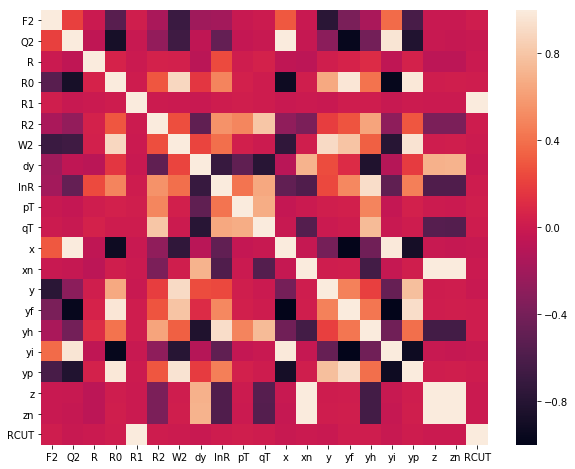

In [11]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
filtered_data = data.drop([
      'Ebeam','obs','value','stat_u','systabs_u','systrel','systole','i','target','hadron','col'
], axis=1)
corr = filtered_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

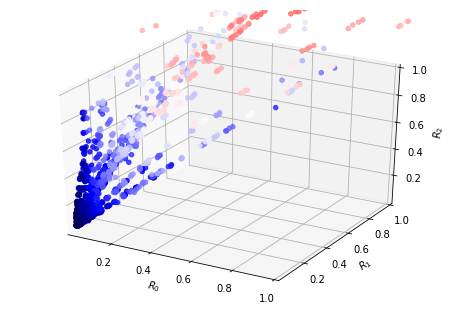

In [12]:
fig, ax, xval, yval, zval = color_plot3D(data,"R0", "R1","R2",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
ax.set_ylim([0.0001,1])
#ax.set_xscale("log")
ax.set_xlim([0.0001,1])
ax.set_zlim([0.0001,1])
##plt.axhline(1,0,1)
#plt.axvline(1,0,1)
#plt.savefig("../Figs/hermes_data_R0_R1_R2.pdf")
plt.show()

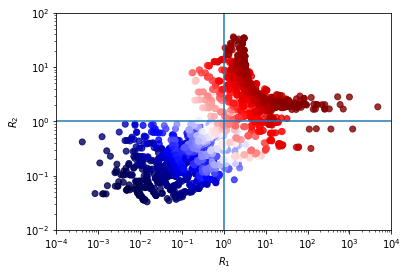

In [13]:
fig, ax, vert, hor = color_plot(data,"R2", "R1",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
ax.set_xscale("log")
ax.set_xlim([0.0001,10000])
plt.axhline(1,0,1)
plt.axvline(1,0,1)
plt.savefig("../Figs/hermes_data_R2_R1.pdf")
plt.show()

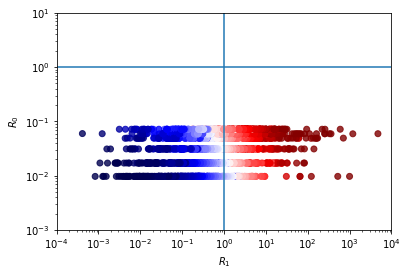

In [14]:
fig, ax, vert, hor = color_plot(data,"R0", "R1",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,10])
ax.set_xscale("log")
ax.set_xlim([0.0001,10000])
plt.axhline(1,0,1)
plt.axvline(1,0,1)
#plt.savefig("../Figs/hermes_data_R0_R1.pdf")
plt.show()

Now let us plot data as function of $p_T$

In [15]:
dat = data
data_q = dat["RCUT"]

##################
## Binning data ##
##################
# data bin edeges

xBin=np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin=np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin= np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot
Phperp = np.array([ 0.0, 0.15, 0.25, 0.35, 0.45, 0.6, 0.8, 1.2]) 
# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

# Selection data to make lines representing where zbins for each bin of x are for pions only
z1x0 = dat.query("z >.1 and z < .2 and xBin == 0 and hadron == 'pi+' ")
z2x0 = dat.query("z > .2 and z < .25 and xBin == 0 and hadron == 'pi+' ")
z3x0 = dat.query("z > .25 and z < .3 and xBin == 0 and hadron == 'pi+' ")
z4x0 = dat.query("z > .3 and z < .375 and xBin == 0 and hadron == 'pi+' ")
z5x0 = dat.query("z > .375 and z < .475 and xBin == 0 and hadron == 'pi+' ")
z6x0 = dat.query("z > .475 and z < .6 and xBin == 0 and hadron == 'pi+' ")
z7x0 = dat.query("z > .6 and z < .8 and xBin == 0 and hadron == 'pi+' ")
z8x0 = dat.query("z > .8 and z < 1.1 and xBin == 0 and hadron == 'pi+' ")

Zx0 = [z1x0,z2x0,z3x0,z4x0,z5x0,z6x0,z7x0,z8x0]

z1x1 = dat.query("z >.1 and z < .2 and xBin == 1 and hadron == 'pi+' ")
z2x1 = dat.query("z > .2 and z < .25 and xBin == 1 and hadron == 'pi+' ")
z3x1 = dat.query("z > .25 and z < .3 and xBin == 1 and hadron == 'pi+' ")
z4x1 = dat.query("z > .3 and z < .375 and xBin == 1 and hadron == 'pi+' ")
z5x1 = dat.query("z > .375 and z < .475 and xBin == 1 and hadron == 'pi+' ")
z6x1 = dat.query("z > .475 and z < .6 and xBin == 1 and hadron == 'pi+' ")
z7x1 = dat.query("z > .6 and z < .8 and xBin == 1 and hadron == 'pi+' ")
z8x1 = dat.query("z > .8 and z < 1.1 and xBin == 1 and hadron == 'pi+' ")

Zx1 = [z1x1,z2x1,z3x1,z4x1,z5x1,z6x1,z7x1,z8x1]

z1x2 = dat.query("z >.1 and z < .2 and xBin == 2 and hadron == 'pi+' ")
z2x2 = dat.query("z > .2 and z < .25 and xBin == 2 and hadron == 'pi+' ")
z3x2 = dat.query("z > .25 and z < .3 and xBin == 2 and hadron == 'pi+' ")
z4x2 = dat.query("z > .3 and z < .375 and xBin == 2 and hadron == 'pi+' ")
z5x2 = dat.query("z > .375 and z < .475 and xBin == 2 and hadron == 'pi+' ")
z6x2 = dat.query("z > .475 and z < .6 and xBin == 2 and hadron == 'pi+' ")
z7x2 = dat.query("z > .6 and z < .8 and xBin == 2 and hadron == 'pi+' ")
z8x2 = dat.query("z > .8 and z < 1.1 and xBin == 2 and hadron == 'pi+' ")

Zx2 = [z1x2,z2x2,z3x2,z4x2,z5x2,z6x2,z7x2,z8x2]

z1x3 = dat.query("z >.1 and z < .2 and xBin == 3 and hadron == 'pi+' ")
z2x3 = dat.query("z > .2 and z < .25 and xBin == 3 and hadron == 'pi+' ")
z3x3 = dat.query("z > .25 and z < .3 and xBin == 3 and hadron == 'pi+' ")
z4x3 = dat.query("z > .3 and z < .375 and xBin == 3 and hadron == 'pi+' ")
z5x3 = dat.query("z > .375 and z < .475 and xBin == 3 and hadron == 'pi+' ")
z6x3 = dat.query("z > .475 and z < .6 and xBin == 3 and hadron == 'pi+' ")
z7x3 = dat.query("z > .6 and z < .8 and xBin == 3 and hadron == 'pi+' ")
z8x3 = dat.query("z > .8 and z < 1.1 and xBin == 3 and hadron == 'pi+' ")

Zx3 = [z1x3,z2x3,z3x3,z4x3,z5x3,z6x3,z7x3,z8x3]

z1x4 = dat.query("z >.1 and z < .2 and xBin == 4 and hadron == 'pi+' ")
z2x4 = dat.query("z > .2 and z < .25 and xBin == 4 and hadron == 'pi+' ")
z3x4 = dat.query("z > .25 and z < .3 and xBin == 4 and hadron == 'pi+' ")
z4x4 = dat.query("z > .3 and z < .375 and xBin == 4 and hadron == 'pi+' ")
z5x4 = dat.query("z > .375 and z < .475 and xBin == 4 and hadron == 'pi+' ")
z6x4 = dat.query("z > .475 and z < .6 and xBin == 4 and hadron == 'pi+' ")
z7x4 = dat.query("z > .6 and z < .8 and xBin == 4 and hadron == 'pi+' ")
z8x4 = dat.query("z > .8 and z < 1.1 and xBin == 4 and hadron == 'pi+' ")

Zx4 = [z1x4,z2x4,z3x4,z4x4,z5x4,z6x4,z7x4,z8x4]

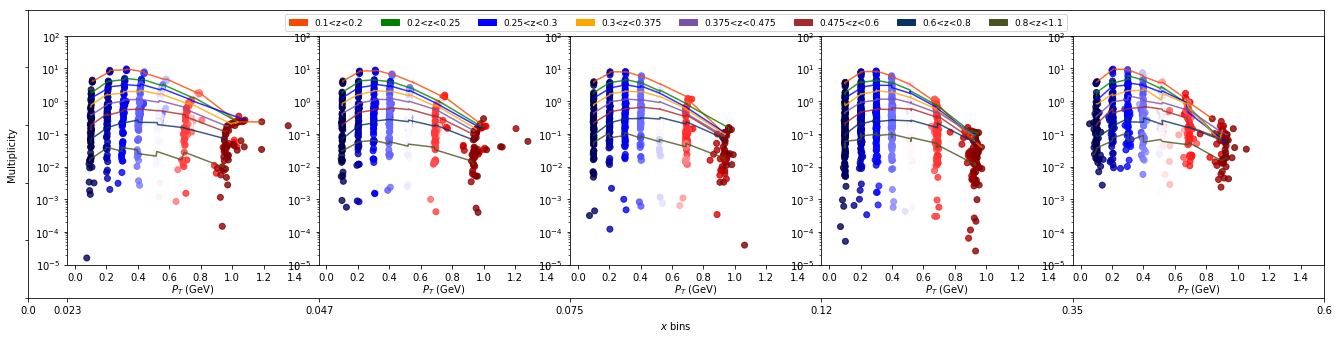

In [16]:



# bins for x and y that have non-empty intersection
pTdatmod=[0,1,2,3,4] # xBins that overlap Q2Bins
valuedatmod=[0] # Q2bins that overlap xBins

###############
# HermesPlot ##
###############  Reduced matix 
#initialize the figure
fig1=py.figure(figsize=(18, 4),facecolor="white") # figsize; wxh in inche
globalGrid=gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(1,5, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 
#fig1.autolayout = True
#figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
ax.xaxis.set_ticks([0,.3,2.245,4.18,6.12,8.06,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 

ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
#ax.set_ylabel(r"$Q^2$",rotation="horizontal",labelpad = 15)
ax.set_ylabel(r"Multiplicity")
# subplot axis proerties (unused)
Zcolor=['#F74902',"green","blue",'orange',"#7851a9","brown",'#093162','#4b5320']
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='0.1<z<0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='0.2<z<0.25')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='0.25<z<0.3')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='0.3<z<0.375')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='0.375<z<0.475')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='0.475<z<0.6')
Zpatch7 = mpatches.Patch(color=Zcolor[6], label='0.6<z<0.8')
Zpatch8 = mpatches.Patch(color=Zcolor[7], label='0.8<z<1.1')
         
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6,Zpatch7,Zpatch8],
          loc='upper center',
          ncol=8,prop={'size': 9}
          )
color_percentiles = partial(percentileofscore, data_q)
colors = data_q.apply(color_percentiles)
colors_used = []

for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        
        k = int(f) # kth possition for subplot on innerGrid matrix
        maskX = dat['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY = dat['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
       
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            if f != 0:
                if F == 1:
                    linedata = Zx1[z]
                elif F == 2:
                    linedata = Zx2[z]
                elif F == 3:
                    linedata = Zx3[z]
                elif F == 4:
                    linedata = Zx4[z]
                plot = ax.scatter(databin['pT'],databin['value'], c=databin['pT'], cmap=plt.get_cmap('seismic'), alpha=0.8)
                ax.plot(linedata['pT'],linedata['value'], c=Zcolor[z], alpha=0.8)
                colors_used.append(plot.to_rgba(databin['pT']))
                ax.set_xlim([-0.05,1.55])
                ax.set_ylim([10**(-5),10**2])
                ax.set_xlabel(r"$P_T$ (GeV)",labelpad=1)
                #ax.set_yticklabels('')
                ax.set_yscale('log')
               
            else:
                if F == 0:
                    linedata = Zx0[z]
                plot = ax.scatter(databin['pT'],databin['value'], c=databin['pT'], cmap=plt.get_cmap('seismic'), alpha=0.8)
                ax.plot(linedata['pT'],linedata['value'], c=Zcolor[z], alpha=0.8) 
                colors_used.append(plot.to_rgba(databin['pT']))
                ax.set_xlabel(r"$P_T$ (GeV)",labelpad=1)
                #ax.set_ylabel(r"Multiplicity")
                ax.set_xlim([-0.05,1.55])
                ax.set_ylim([10**(-5),10**2])
                ax.set_yscale('log')
# I was having trouble changing directory for this save so I could see the image better,
# and that is why it was saved in this notebook dir               
#plt.savefig("hermes_data_PT_wLines.pdf", bbox_inches = "tight")
plt.show()             